In [64]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('/..')

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

from utils.causal_graph import CausalGraph

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Some basic graphs and dynamics

- How do firing patterns differ given input?
- Take fft, pca of "spikes"

## Resources
- [NetworkX generators](https://networkx.org/documentation/stable/reference/generated/networkx.generators.community.gaussian_random_partition_graph.html)

# Periodic tiling

square

In [40]:
for i in range(1,6+1):
    print(i%5)

1
2
3
4
0
1


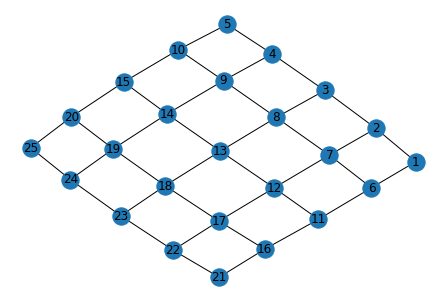

In [59]:
def make_lattice(l,w):
    edges = []
    for i in range(l*w+1): # add one for final node to pass second statement
        if (i%w) != 0:
            edges.append((i, i+1))
        if i-w > 0: #if i > w:
            edges.append((i,i-w))
                
    return edges
e = make_lattice(5,5)
G = nx.Graph(e)
nx.draw(G, with_labels=True)

In [13]:
scale_free = nx.scale_free_graph(100)

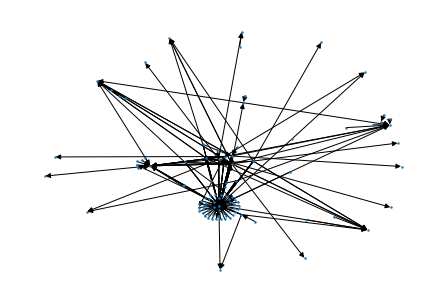

In [10]:
nx.draw(scale_free, node_size=2)

In [94]:
G = nx.gaussian_random_partition_graph(1000, 10, 10, 0.25, 0.1)
# nx.draw(G, node_size=2)

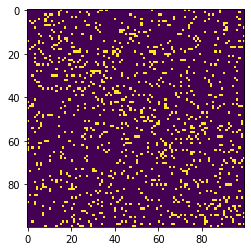

In [78]:
plt.imshow(nx.adjacency_matrix(G).todense())

In [72]:
np.linalg.matrix_power(nx.adjacency_matrix(G), 5)

LinAlgError: 0-dimensional array given. Array must be at least two-dimensional

In [96]:
cg = CausalGraph(G)
r_ix = 30
init = np.zeros(1000)
init[r_ix] = 1
raster = cg.simulate(init, 10)
raster

(1, 1000) 
 [[0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
  1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1.
  0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
  1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.
  0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
  0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
  0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 1. 0. 0. 0. 0. 

KeyboardInterrupt: 